# Topic Modeling Implementation

In Latent Dirichlet Allocation (LDA), a topic and a term refer to different components of the model:

### Topics:

- **Definition:** Topics represent distributions over words. In LDA, a topic is a probability distribution over a fixed vocabulary of words, where each word has a probability of occurring in that topic.
- **Interpretation:** Each topic is a set of words that are likely to co-occur together within a certain theme or concept. It's represented as a probability distribution over the entire vocabulary, indicating the likelihood of each word belonging to that topic.
- **Example:** In a collection of documents about sports, a topic might represent words like "game," "player," "team," "score," indicating a sports-related theme.

### Terms (or Words):

- **Definition:** Terms (or words) refer to the individual words in the vocabulary of the corpus. Each term can belong to multiple topics, each with a certain probability.
- **Interpretation:** Terms are the building blocks of the documents and topics. They are represented as individual elements in the vocabulary and can have different probabilities of being associated with various topics.
- **Example:** In a corpus, terms could be individual words like "ball," "goal," "coach," "strategy," etc., which collectively form the vocabulary used by the model.

### Relationship:

- **Topic-Word Distribution:** In LDA, each topic is represented as a probability distribution over the entire vocabulary of words. This distribution defines the likelihood of each word occurring in that topic.
- **Document-Topic Distribution:** Documents are assumed to be mixtures of topics. Each document is represented as a distribution over topics, indicating the proportion of each topic present in the document.
- **Word Assignment:** LDA assigns each word in each document to a particular topic based on the probabilities associated with topics and words.

### Summary:

- **Topics:** Probabilistic distributions over words, representing themes or concepts in the corpus.
- **Terms (Words):** Individual elements in the vocabulary, each having probabilities of being associated with different topics.
- **LDA Modeling:** Aims to uncover these latent topics by analyzing the distribution of words across documents while inferring the distribution of topics across the documents.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint
sns.set()

In [2]:
data = pd.read_excel("data/articles.xlsx", index_col=0)
data.head()

Title    Journal  Year                                           Abstract
0  Title 1  Journal 1  1988  PURPOSE THIS ARTICLE EXAMINES THE NEW PHENOMEN...
1  Title 2  Journal 2  1982  PURPOSE EMPLOYEE WELLNESS IS VITAL TO CREATING...
2  Title 3  Journal 3  1981  PURPOSE TO INVESTIGATE IF ONLINE TV CONTENT PL...
3  Title 4  Journal 3  1990  PURPOSE RESPONDING TO AN INCREASING CALL FOR A...
4  Title 5  Journal 3  1990  PURPOSE THE PURPOSE OF THIS STUDY IS TO IDENTI...

In [3]:
data.shape

(6000, 4)

In [4]:
data["Abstract"][0]

'PURPOSE THIS ARTICLE EXAMINES THE NEW PHENOMENON OF THE CONVERGENCE OF PLATFORM AND PIPELINE BUSINESS MODELS. IT EXAMINES THE POTENTIAL SYNERGIES AND CHALLENGES FOR PLATFORMS TO ADD PIPELINE COMPONENTS AND VICE VERSA FOR PIPELINE BUSINESSES. DESIGN/METHODOLOGY/APPROACH THIS PAPER USES A CONCEPTUAL APPROACH THAT SYNTHESIZES AND INTEGRATES THE LITERATURE FROM SERVICE, HOSPITALITY, AND STRATEGY, AND SUPPLEMENTS THEM WITH TWO ILLUSTRATIVE MINI-CASE STUDIES. FINDINGS WHILE THE EXTANT LITERATURE TYPICALLY FOCUSES ON THE DICHOTOMY BETWEEN INCUMBENT PIPELINE BUSINESSES THAT CREATE VALUE BY CONTROLLING A LINEAR SERIES OF ACTIVITIES AND NETWORK EFFECTS-DRIVEN PLATFORMS, WE DIFFERENTIATE BETWEEN TWO TYPES OF PLATFORM BUSINESS MODELS (I.E. PLATFORMS WITH ASSET CONTROL AND PLATFORMS WITH PEER-PROVIDED ASSETS). FURTHER, WE IDENTIFY THREE COMMON PATHWAYS OF CONVERGENCE; THAT IS, PIPELINES MOVING TOWARDS (1) PLATFORMS WITH ASSET CONTROL AND (2) THOSE WITH PEER-PROVIDED ASSETS, AND (3) PLATFORMS WITH 

In [5]:
data["Journal"].value_counts()

Journal
Journal 15    972
Journal 8     899
Journal 2     616
Journal 10    327
Journal 4     317
Journal 5     310
Journal 1     306
Journal 3     298
Journal 6     293
Journal 12    292
Journal 14    275
Journal 13    274
Journal 7     274
Journal 11    274
Journal 9     273
Name: count, dtype: int64

In [6]:
data.Journal.value_counts(ascending=True).index

Index(['Journal 9', 'Journal 13', 'Journal 7', 'Journal 11', 'Journal 14',
       'Journal 12', 'Journal 6', 'Journal 3', 'Journal 1', 'Journal 5',
       'Journal 4', 'Journal 10', 'Journal 2', 'Journal 8', 'Journal 15'],
      dtype='object', name='Journal')

<Axes: xlabel='count', ylabel='Journal'>

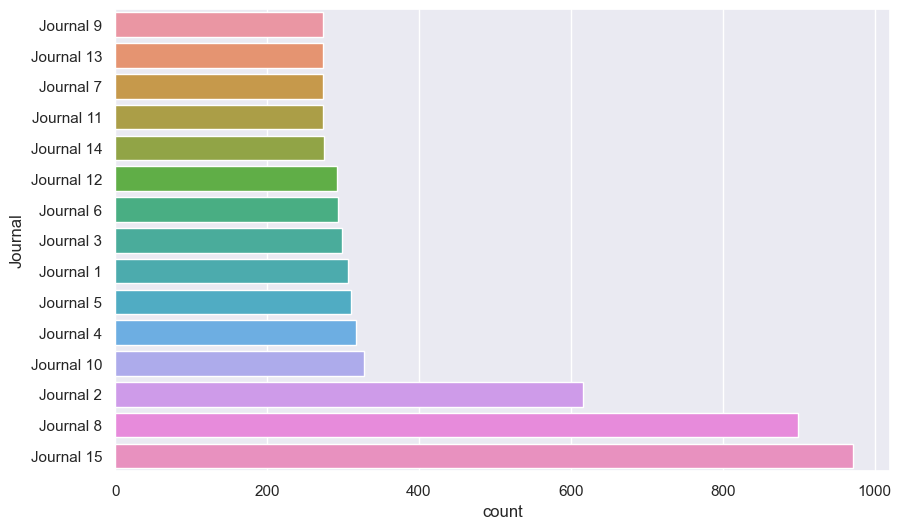

In [7]:

# order article counts per journal and get the index
order = data.Journal.value_counts(ascending=True).index

plt.figure(figsize=(10,6))
sns.countplot(y='Journal', data=data, orient='h', order=order)

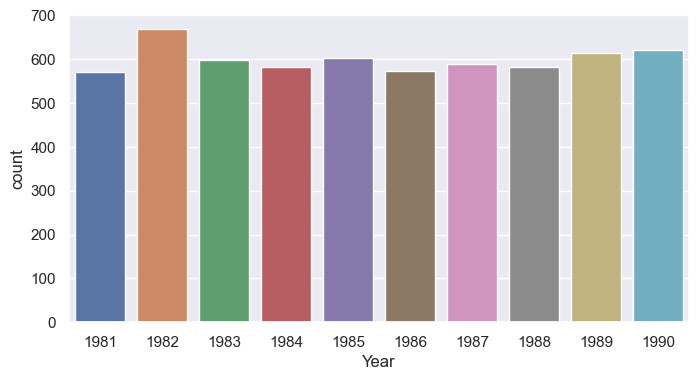

In [8]:

plt.figure(figsize=(8,4))
sns.countplot(x='Year', data=data);

In [9]:

pd.crosstab(data.Journal, data.Year)

Year        1981  1982  1983  1984  1985  1986  1987  1988  1989  1990
Journal                                                               
Journal 1     34    34    24    29    41    27    23    34    26    34
Journal 10    24    37    30    41    35    35    27    39    33    26
Journal 11    31    38    22    18    28    26    26    30    28    27
Journal 12    38    27    36    29    23    18    28    41    28    24
Journal 13    20    26    29    27    36    27    27    26    33    23
Journal 14    23    28    27    23    32    32    37    18    26    29
Journal 15    85   125    91    86   102    92    93    92    98   108
Journal 2     53    66    78    77    52    59    60    53    64    54
Journal 3     39    28    33    15    32    30    31    24    28    38
Journal 4     35    38    25    28    30    38    32    23    34    34
Journal 5     35    36    30    30    36    22    24    36    30    31
Journal 6     27    33    24    33    29    22    35    31    24    35
Journal 7     28    32    27    31    23    28    30    25    29    21
Journal 8     77    93    95    77    79    94    87    85    98   114
Journal 9     21    28    28    38    24    22    30    26    34    22

## The number of articles per journal per year is above:

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:3201: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


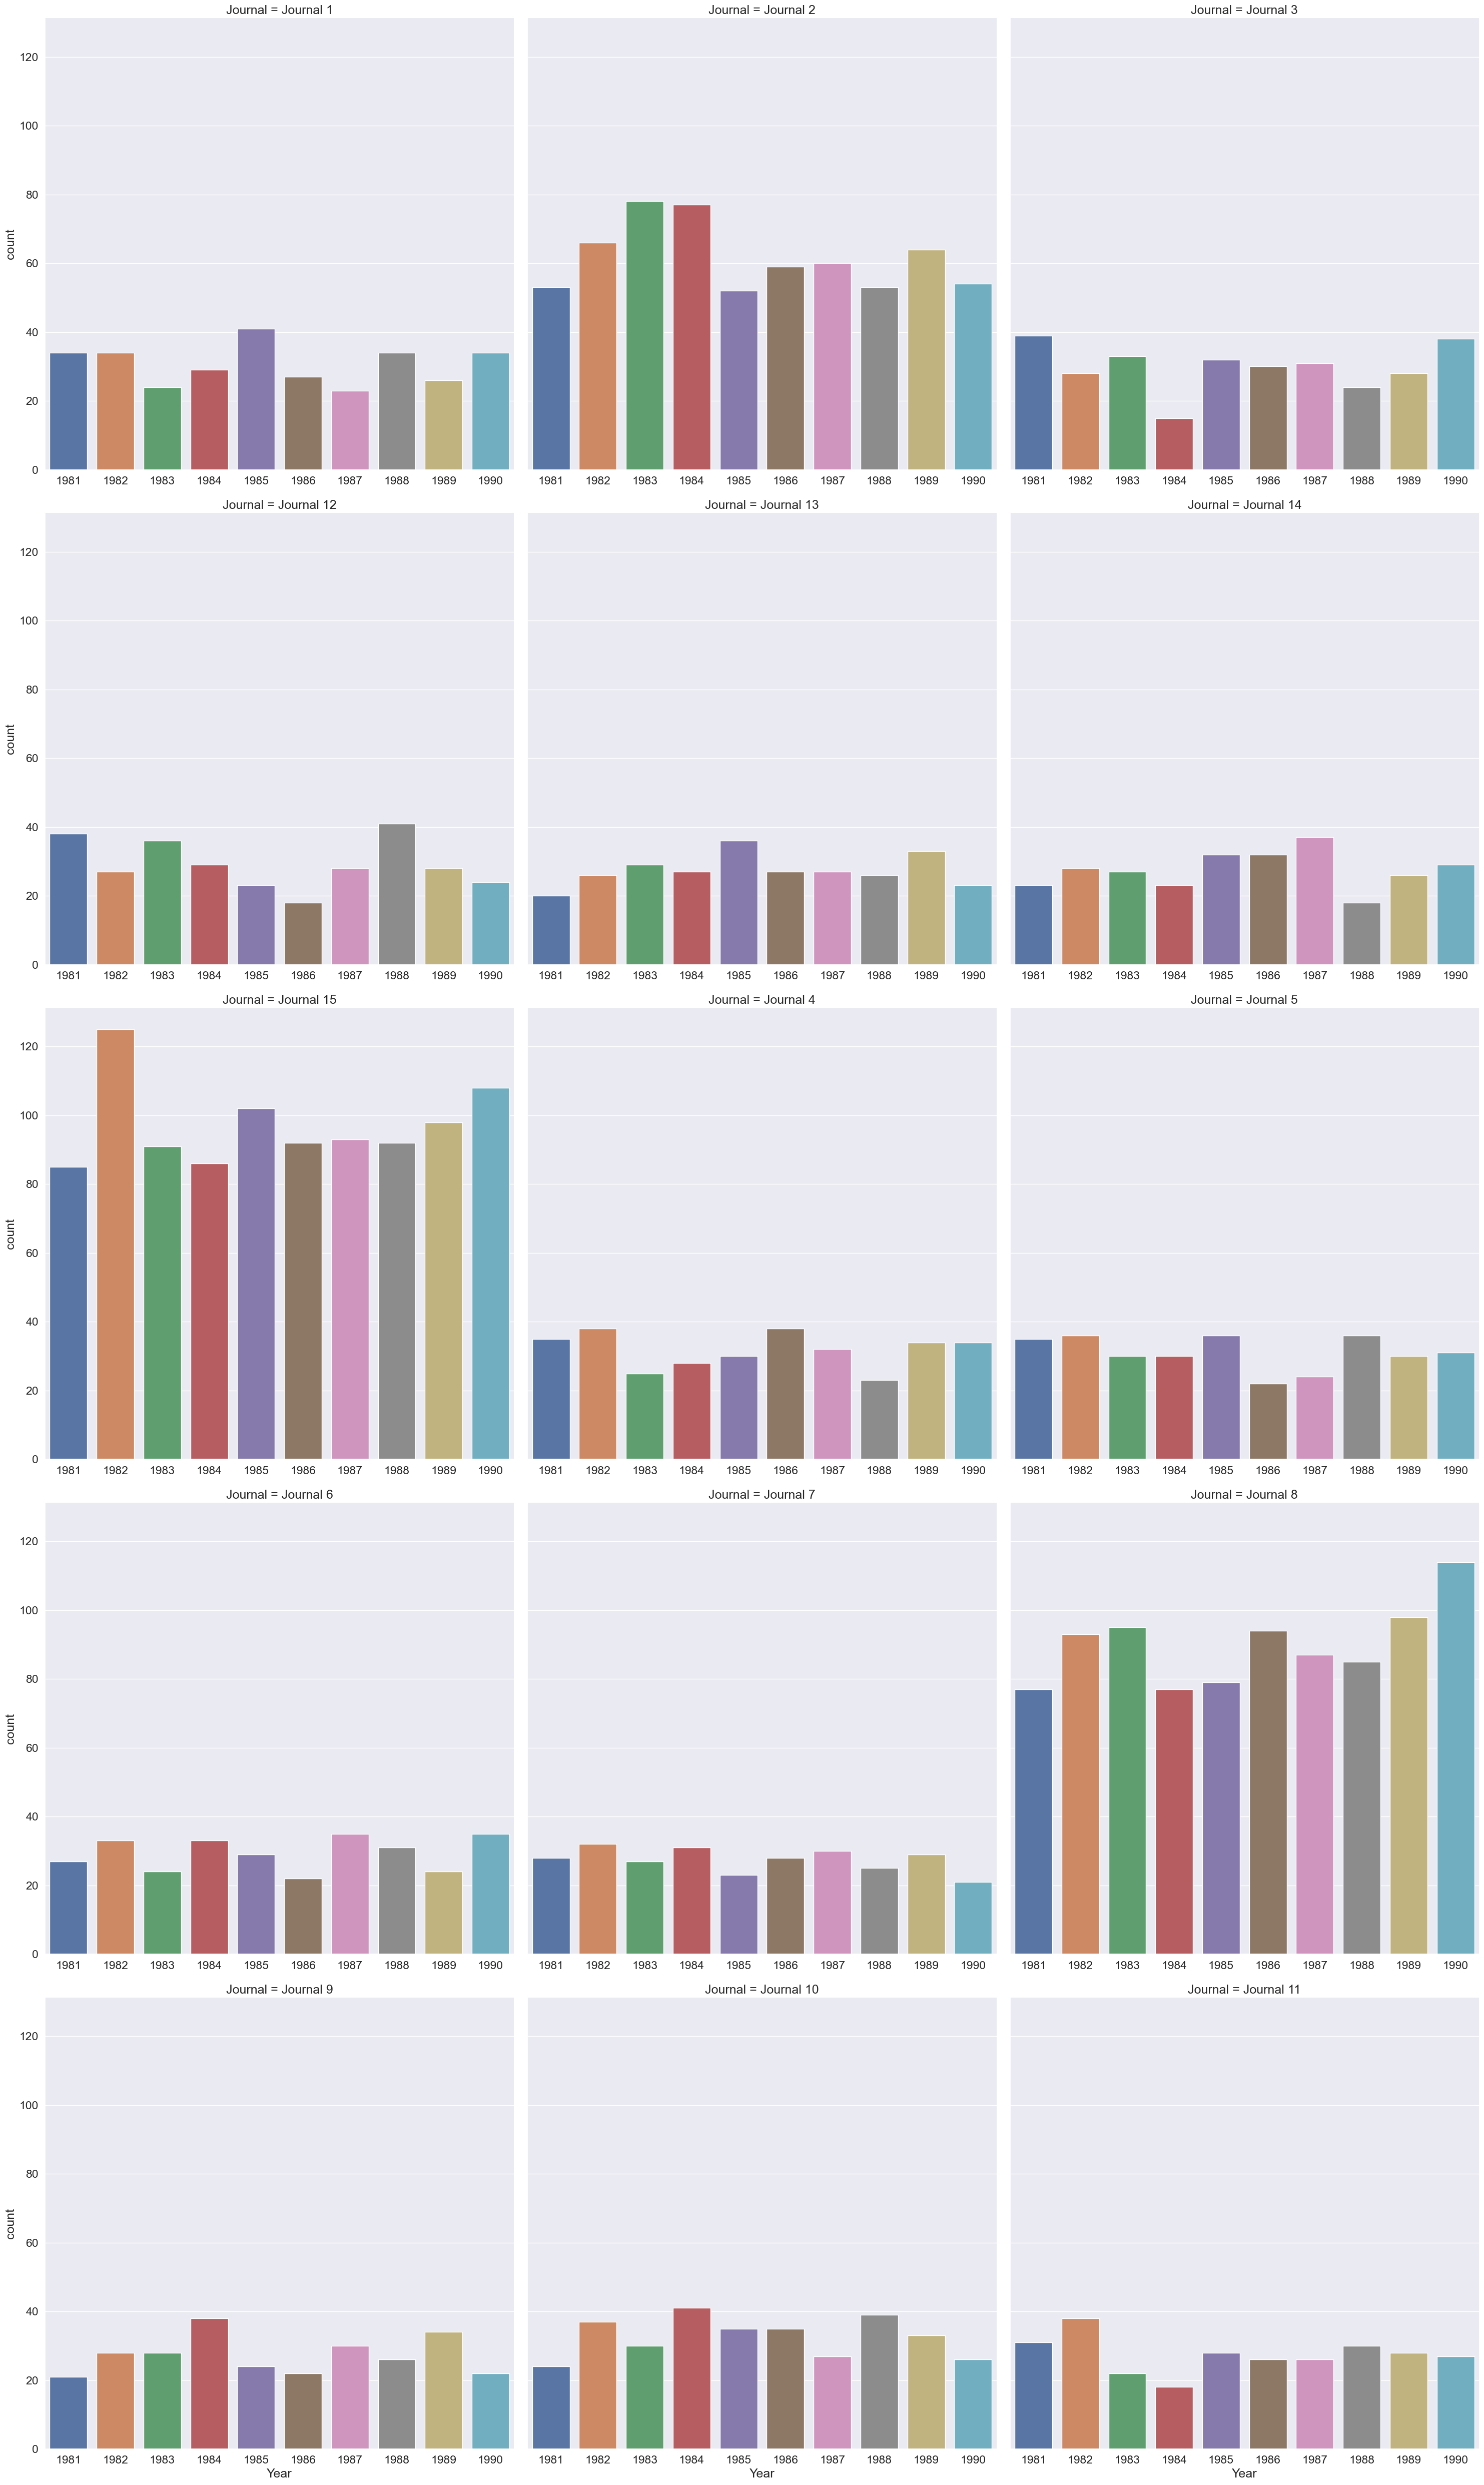

In [10]:

sns.set(font_scale=1.5)
sns.catplot(data=data, x='Year', col="Journal", col_wrap=3, sharex=False, height=10, kind='count');

# Analysis

In [11]:
# import nltk library and then download stopwords
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim

In [13]:
# spacy for lemmatization
import spacy
     

C:\Users\Admin\anaconda3\lib\site-packages\plac_ext.py:806: DeprecationWarning: The asyncore module is deprecated and will be removed in Python 3.12. The recommended replacement is asyncio
  import asyncore
C:\Users\Admin\anaconda3\lib\site-packages\plac_ext.py:807: DeprecationWarning: The asynchat module is deprecated and will be removed in Python 3.12. The recommended replacement is asyncio
  import asynchat


# Preprocessing

In [14]:
# First, get all the abstracts and convert them to a list of strings:
data = list(data.Abstract)
data[:2]
     

['PURPOSE THIS ARTICLE EXAMINES THE NEW PHENOMENON OF THE CONVERGENCE OF PLATFORM AND PIPELINE BUSINESS MODELS. IT EXAMINES THE POTENTIAL SYNERGIES AND CHALLENGES FOR PLATFORMS TO ADD PIPELINE COMPONENTS AND VICE VERSA FOR PIPELINE BUSINESSES. DESIGN/METHODOLOGY/APPROACH THIS PAPER USES A CONCEPTUAL APPROACH THAT SYNTHESIZES AND INTEGRATES THE LITERATURE FROM SERVICE, HOSPITALITY, AND STRATEGY, AND SUPPLEMENTS THEM WITH TWO ILLUSTRATIVE MINI-CASE STUDIES. FINDINGS WHILE THE EXTANT LITERATURE TYPICALLY FOCUSES ON THE DICHOTOMY BETWEEN INCUMBENT PIPELINE BUSINESSES THAT CREATE VALUE BY CONTROLLING A LINEAR SERIES OF ACTIVITIES AND NETWORK EFFECTS-DRIVEN PLATFORMS, WE DIFFERENTIATE BETWEEN TWO TYPES OF PLATFORM BUSINESS MODELS (I.E. PLATFORMS WITH ASSET CONTROL AND PLATFORMS WITH PEER-PROVIDED ASSETS). FURTHER, WE IDENTIFY THREE COMMON PATHWAYS OF CONVERGENCE; THAT IS, PIPELINES MOVING TOWARDS (1) PLATFORMS WITH ASSET CONTROL AND (2) THOSE WITH PEER-PROVIDED ASSETS, AND (3) PLATFORMS WITH

In [15]:
stop_words = nltk.corpus.stopwords.words('english')

# Build the Bigram, Trigram Models and Lemmatize

In [16]:
# gensim libraries for preprocessing and building the model:

In [17]:
import gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

## Preprocessing
I will perform the following steps:

**Tokenization:** split the sentences into words while lowercasing the words, removing punctuation, ignoring tokens that are too short, and removing letter accents.

**Lemmatization:** remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma. “used”, “using”, “uses” words are all converted to “use”.

**Ngrams implementation:** extracting sequence of ‘n’ words that occur frequently in the corpus. Here we implement bi-grams and tri-grams that mean 2 words and 3 words in sequence respectively. (bi-gram: network_theory; tri-gram: complex_network_theory)

**Speech of tag selection:** When you call nlp on a text, spaCy first tokenizes the text to produce a Doc object. The Doc is then processed in several different steps – this is also referred to as the processing pipeline. The pipeline used by the default models consists of a tagger, a parser and an entity recognizer. Here we don’t need parser and entity recognizer, therefore we will only use tagger. We will check part of speech tag of each token and keep only the nouns, adjectives, verbs, and adverbs.

In [18]:

# Build the bigram and trigrams
bigram = gensim.models.Phrases(data, min_count=20, threshold=100) 
trigram = gensim.models.Phrases(bigram[data], threshold=100)  

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [19]:
# only need tagger, no need for parser and named entity recognizer, for faster implementation
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

The explanation for gensim.utils.simple_preprocess function:

gensim.utils.simple_preprocess(doc, deacc=False, min_len=2, max_len=15)

Convert a document into a list of lowercase tokens, ignoring tokens that are too short or too long.
doc (str) — Input document.
deacc (bool, optional) — Remove accent marks from tokens (convert “bílý” to “bily)
min_len (int, optional) — Minimum length of token (inclusive). Shorter tokens are discarded.

In [20]:

def process_words(texts, stop_words=stop_words, allowed_tags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    
    """Convert a document into a list of lowercase tokens, build bigrams-trigrams, implement lemmatization"""
    
    # remove stopwords, short tokens and letter accents 
    texts = [[word for word in simple_preprocess(str(doc), deacc=True, min_len=3) if word not in stop_words] for doc in texts]
    
    # bi-gram and tri-gram implementation
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    
    texts_out = []

    # implement lemmatization and filter out unwanted part of speech tags
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_tags])
    
    # remove stopwords and short tokens again after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc), deacc=True, min_len=3) if word not in stop_words] for doc in texts_out]    
    
    return texts_out

In [21]:
# The output data_ready is a list containing list of strings for each document (abstract). Now, the data is ready for building the model.
data_ready = process_words(data) 

In [22]:
data_ready

[['purpose',
  'article',
  'examine',
  'new',
  'phenomenon',
  'platform',
  'pipeline',
  'business',
  'model',
  'examine',
  'potential',
  'synergy',
  'challenge',
  'platform',
  'add',
  'pipeline',
  'component',
  'vice',
  'versa',
  'pipeline',
  'business',
  'design',
  'methodology',
  'approach',
  'paper',
  'use',
  'conceptual',
  'approach',
  'synthesize',
  'integrate',
  'literature',
  'service',
  'hospitality',
  'strategy',
  'supplement',
  'illustrative',
  'mini',
  'case',
  'study',
  'finding',
  'extant',
  'literature',
  'typically',
  'focus',
  'dichotomy',
  'incumbent',
  'pipeline',
  'business',
  'create',
  'value',
  'control',
  'linear',
  'series',
  'activity',
  'network',
  'effect',
  'drive',
  'platform',
  'differentiate',
  'type',
  'platform',
  'business',
  'model',
  'platforms',
  'provide',
  'asset',
  'identify',
  'common',
  'pathway',
  'convergence',
  'pipeline',
  'move',
  'platform',
  'provide',
  'asset',
  '

# Create the Dictionary and Corpus
The model requires a dictionary and a corpus to process. 

Dictionary contains all the words and numerical identifiers one for each unique word. On the other hand, corpus is a list of lists containing tuples for each word id and its frequency.



create dictionary and get the length of vocabulary:

We start with converting a collection of words to a bag of words, which is a list of tuples (word_id, word_frequency). gensim.corpora.Dictionary is a great tool for this:

In [23]:
id2word = corpora.Dictionary(data_ready)
print('Total Vocabulary Size:', len(id2word))

Total Vocabulary Size: 12845


From now on, you can skip until the filter extremes part. You can filter extreme words and then create corpus. However, for my experience, it’s a good practice to check word frequencies in the corpus and filter out high-frequency words that are over a certain threshold. Since these are generally corpus specific or general writing words, they don’t help much to cluster topics.

create corpus:

In [24]:
#[[(id2word[i], freq) for i, freq in doc] for doc in corpus[:1]]

In [25]:
corpus = [id2word.doc2bow(text) for text in data_ready]

In [26]:
corpus[:2]

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 2),
  (5, 3),
  (6, 7),
  (7, 12),
  (8, 1),
  (9, 8),
  (10, 2),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 2),
  (16, 2),
  (17, 7),
  (18, 1),
  (19, 2),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 4),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 2),
  (35, 2),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 2),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 2),
  (46, 1),
  (47, 1),
  (48, 3),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 8),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 3),
  (67, 1),
  (68, 11),
  (69, 9),
  (70, 1),
  (71, 5),
  (72, 1),
  (73, 6),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 2),
  (78, 1),
  (79, 1),
  (80, 2),
  (81, 3),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 2),
  (86, 6),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 1),
  (91, 

Now, I create a dictionary and then convert it to a dataframe that shows each word in the corpus and its frequency:



In [27]:

dict_corpus = {}

for i in range(len(corpus)):
    
      for idx, freq in corpus[i]:
            if id2word[idx] in dict_corpus:
                dict_corpus[id2word[idx]] += freq
            else:
                dict_corpus[id2word[idx]] = freq


In [28]:

dict_df = pd.DataFrame.from_dict(dict_corpus, orient='index', columns=['freq'])

In [29]:
dict_corpus

{'activity': 1059,
 'add': 136,
 'adopt': 406,
 'also': 1845,
 'approach': 1644,
 'article': 871,
 'asset': 94,
 'business': 917,
 'case': 762,
 'challenge': 515,
 'characteristic': 455,
 'common': 199,
 'component': 262,
 'conceptual': 395,
 'consideration': 140,
 'contrast': 135,
 'control': 301,
 'convergence': 36,
 'create': 572,
 'define': 206,
 'design': 992,
 'develop': 1451,
 'dichotomy': 20,
 'different': 1437,
 'differentiate': 86,
 'drive': 328,
 'effect': 2164,
 'embark': 6,
 'encounter': 232,
 'entail': 33,
 'examine': 1832,
 'extant': 81,
 'extension': 30,
 'finally': 202,
 'finding': 2330,
 'first': 697,
 'focus': 1014,
 'furthermore': 248,
 'help': 406,
 'hospitality': 400,
 'identify': 1319,
 'illustrative': 15,
 'implication': 1707,
 'incumbent': 11,
 'integrate': 296,
 'key': 737,
 'likely': 254,
 'linear': 82,
 'literature': 1081,
 'manager': 698,
 'many': 516,
 'may': 1012,
 'methodology': 565,
 'mini': 5,
 'minor': 9,
 'mitigate': 74,
 'model': 2737,
 'move': 91,


In [30]:
dict_df.sort_values(by="freq", ascending=False)

freq
tourism          10971
study             7072
tourist           5608
use               4567
destination       4029
...                ...
trafficestimate      1
nadu                 1
fta                  1
alexa                1
disassociate         1

[12845 rows x 1 columns]

C:\Users\Admin\AppData\Local\Temp\ipykernel_23660\2993245595.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dict_df['freq'], bins=100);
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.

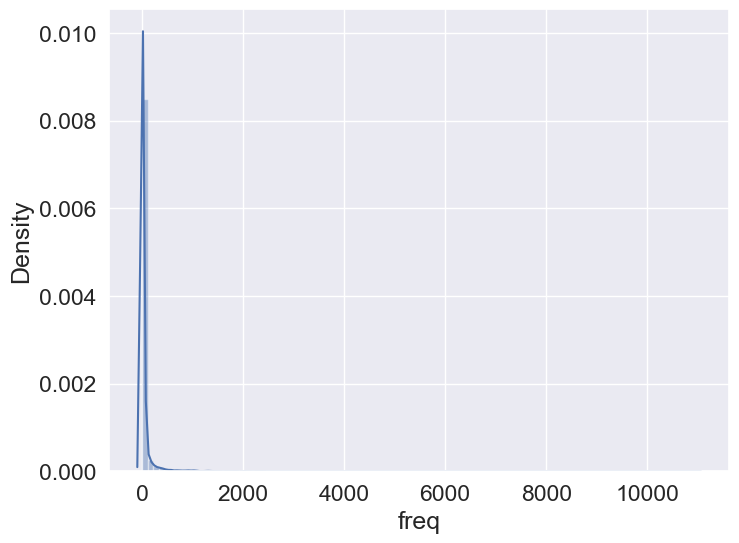

In [31]:

plt.figure(figsize=(8,6))
sns.distplot(dict_df['freq'], bins=100);
     

Now we should set a threshold to filter out high-frequency words. It’s more or less a trial and error step. For our corpus, we set it to 1500 and will filter out those words that have frequency over 1500. Let’s store those words in a list:

In [32]:
extension = dict_df[dict_df.freq>1500].index.tolist()

In [33]:
extension

['also',
 'approach',
 'effect',
 'examine',
 'finding',
 'implication',
 'model',
 'paper',
 'provide',
 'service',
 'study',
 'use',
 'value',
 'customer',
 'factor',
 'influence',
 'research',
 'base',
 'experience',
 'result',
 'development',
 'hotel',
 'impact',
 'show',
 'social',
 'relationship',
 'analysis',
 'tourism',
 'destination',
 'travel',
 'tourist']

For filtering words from the dictionary there are two options. First, we can get ids of words in the extension list and filter out them immediately from the dictionary as below:



In [34]:
ids=[id2word.token2id[extension[i]] for i in range(len(extension))]
id2word.filter_tokens(bad_ids=ids)

or, as a second option, we can add those words to stop words list and rerun the process_words function, since these words have an effect on forming bi-grams and tri-grams. For my experience, the second option gives better results. You can pick either method for your corpus and compare the results.

In [35]:
# add high frequency words to stop words list
stop_words.extend(extension)
# rerun the process_words function
data_ready = process_words(data)
# recreate Dictionary
id2word = corpora.Dictionary(data_ready)
print('Total Vocabulary Size:', len(id2word))

Total Vocabulary Size: 12952


As you may realize, we have more words in the last dictionary even we filtered out high-frequency words.

**Filter extreme words**

Next, we will remove all words that occur in less than 10 documents (abstracts) and all words that occur in more than 50% of all the documents.

In [36]:
# Filter out words that occur less than 10 documents, or more than
# 50% of the documents.
id2word.filter_extremes(no_below=10, no_above=0.5)
print('Total Vocabulary Size:', len(id2word))

Total Vocabulary Size: 3182


After this final step, there remain 3176 words in the dictionary.

Now, we can create the last version of corpus as below:

In [37]:
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

In [38]:
corpus[:2]

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 3),
  (4, 7),
  (5, 12),
  (6, 1),
  (7, 8),
  (8, 2),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 2),
  (15, 2),
  (16, 7),
  (17, 1),
  (18, 2),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 2),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 2),
  (36, 1),
  (37, 1),
  (38, 2),
  (39, 1),
  (40, 1),
  (41, 3),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 3),
  (56, 1),
  (57, 9),
  (58, 5),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 2),
  (64, 1),
  (65, 1),
  (66, 3),
  (67, 1),
  (68, 1),
  (69, 6),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1)],
 [(17, 1),
  (19, 1),
  (20, 1),
  (35, 1),
  (45, 1),
  (52, 1),
  (60, 1),
  (74, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 2),
  (81, 1),
  (82, 1),
  (83, 

In [39]:
from gensim.models import LdaModel

In [40]:
# Build LDA model
lda_model = LdaModel(corpus=corpus,
                   id2word=id2word,
                   num_topics=10,
                   random_state=0,
                   chunksize=100,
                   alpha='auto',
                   per_word_topics=True)

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.049*"website" + 0.030*"network" + 0.027*"leisure" + 0.023*"business" + '
  '0.023*"share" + 0.018*"activity" + 0.018*"park" + 0.016*"volunteer" + '
  '0.012*"need" + 0.011*"blog"'),
 (1,
  '0.021*"resident" + 0.020*"article" + 0.016*"marketing" + 0.015*"framework" '
  '+ 0.014*"process" + 0.012*"knowledge" + 0.010*"discuss" + '
  '0.010*"management" + 0.010*"concept" + 0.010*"perspective"'),
 (2,
  '0.043*"image" + 0.019*"visit" + 0.018*"visitor" + 0.016*"chinese" + '
  '0.015*"place" + 0.011*"emotional" + 0.011*"emotion" + 0.010*"medium" + '
  '0.009*"people" + 0.008*"region"'),
 (3,
  '0.016*"decision" + 0.016*"risk" + 0.014*"attribute" + 0.014*"information" + '
  '0.014*"product" + 0.013*"country" + 0.012*"market" + 0.012*"datum" + '
  '0.011*"measure" + 0.011*"demand"'),
 (4,
  '0.025*"economic" + 0.025*"change" + 0.018*"industry" + 0.016*"policy" + '
  '0.015*"growth" + 0.015*"constraint" + 0.013*"market" + 0.012*"rural" + '
  '0.012*"area" + 0.012*"long"'),
 (5,
  '0.08

In [41]:
# Explore topics
lda_model.show_topics(num_topics=10, num_words=10)

# Get topic distribution for a specific document
doc_bow = id2word.doc2bow(data_ready[0])
doc_lda = lda_model[doc_bow]
print(doc_lda)



([(0, 0.38527513), (1, 0.11553119), (2, 0.020758571), (3, 0.20928612), (4, 0.09065469), (6, 0.09499996), (8, 0.018998193), (9, 0.0573423)], [(0, [0, 9, 2, 4]), (1, [3, 9, 2]), (2, [0, 1, 3, 9, 4, 2]), (3, [1, 6, 4, 0, 3, 9]), (4, [4, 0, 3]), (5, [0, 3, 4, 1, 9]), (6, [0, 1, 3, 9]), (7, [0, 1, 4, 9, 6, 3]), (8, [0, 3, 4, 8, 9, 6]), (9, [9, 3, 1, 0]), (10, [6, 0, 9, 1, 4, 5]), (11, [1, 0]), (12, [1, 0, 9]), (13, [0, 3, 1, 9]), (14, [0, 3, 9, 2]), (15, [0, 9, 3, 8, 4]), (16, [0, 3]), (17, [0, 1, 9, 3, 2, 4]), (18, [0, 1, 2, 9, 3, 4]), (19, [3, 1, 0, 9, 8, 4, 6, 2]), (20, [3, 1, 0, 4, 9]), (21, [0]), (22, [3, 0, 4, 1, 9, 6]), (23, [3, 9, 2]), (24, [0, 1, 9, 4, 3]), (25, [6, 9, 2, 1]), (26, [0, 3]), (27, [1, 2, 9]), (28, [3]), (29, [3, 0, 6, 9, 4, 1]), (30, [3, 1, 0, 9, 4, 6, 8, 2]), (31, [0, 1, 9, 4, 3, 6, 2]), (32, [3, 8, 9, 4, 2]), (33, [0, 3, 9, 4, 1, 2]), (34, [6, 4, 0, 3, 9]), (35, [3, 0, 1, 4, 9, 6, 2, 8]), (36, [0]), (37, [3, 1, 4, 0, 9, 2]), (38, [0, 3, 1, 6, 4, 9, 2]), (39, [9, 3,

In [42]:
# Visualize topics using pyLDAvis (optional)
import pyLDAvis.gensim
pyLDAvis.enable_notebook()  # For Jupyter Notebook
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)


In [43]:
#Creating Topic Distance Visualization 
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.042682  0.087696       1        1  17.935940
3     -0.080643  0.046203       2        1  15.523377
1      0.133360  0.086776       3        1  15.030841
8     -0.237072  0.099445       4        1  13.459921
2      0.006743  0.133876       5        1  12.832577
4      0.059870  0.040636       6        1  11.646454
5     -0.237933 -0.007669       7        1   4.423575
0      0.160039 -0.003440       8        1   4.418943
7     -0.077812 -0.385501       9        1   2.944160
6      0.230765 -0.098022      10        1   1.784212, topic_info=            Term         Freq        Total Category  logprob  loglift
221        event  1482.000000  1482.000000  Default  30.0000  30.0000
480        brand  1485.000000  1485.000000  Default  29.0000  29.0000
527        image  2127.000000  2127.000000  Default  28.0000  28.0000
381    intention  1780.000000  1780.000000  Default  27.0000  27.0000
137     consumer  1170.000000  1170.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
118     question    82.265477   292.485357  Topic10  -4.4332   2.7577
34   hospitality    91.107153   416.693369  Topic10  -4.3311   2.5059
53          path    62.712482   146.552894  Topic10  -4.7046   3.1774
3        article    99.445917  1615.982649  Topic10  -4.2436   1.2381
452        issue    77.247880   670.426325  Topic10  -4.4962   1.8653

[601 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
611       3  0.969163       academic
611       5  0.016929       academic
611       7  0.008464       academic
2539     10  0.992653         accept
1404      2  0.055004  accommodation
...     ...       ...            ...
553       7  0.004079           year
553       8  0.038755           year
553       9  0.006119           year
553      10  0.004079           year
1926      5  0.990674          young

[1646 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 4, 2, 9, 3, 5, 6, 1, 8, 7])

In [44]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
#pyLDAvis.show(vis, local=False)

In [45]:
import pyLDAvis
print(pyLDAvis.__version__)

3.4.0


In [46]:
from gensim.models import HdpModel

In [47]:
hdp_model = HdpModel(corpus, id2word=id2word)

for idx, topic in hdp_model.print_topics():
    print(f'Topic: {idx} \nWords: {topic}\n')

Topic: 0 
Words: 0.004*industry + 0.004*community + 0.004*datum + 0.004*different + 0.004*develop + 0.004*visitor + 0.003*identify + 0.003*economic + 0.003*level + 0.003*local

Topic: 1 
Words: 0.005*change + 0.004*visitor + 0.004*local + 0.004*intention + 0.003*perceive + 0.003*community + 0.003*image + 0.003*management + 0.003*industry + 0.003*risk

Topic: 2 
Words: 0.004*visitor + 0.004*intention + 0.004*satisfaction + 0.004*brand + 0.004*economic + 0.004*perceive + 0.004*datum + 0.003*community + 0.003*find + 0.003*cultural

Topic: 3 
Words: 0.003*change + 0.003*develop + 0.003*community + 0.002*datum + 0.002*economic + 0.002*image + 0.002*identify + 0.002*industry + 0.002*explore + 0.002*suggest

Topic: 4 
Words: 0.002*process + 0.002*level + 0.002*change + 0.002*consumer + 0.002*different + 0.002*well + 0.002*image + 0.002*high + 0.002*satisfaction + 0.002*datum

Topic: 5 
Words: 0.002*challenging + 0.002*marketing + 0.002*purpose + 0.002*justice + 0.002*motivation + 0.002*high +

In [48]:
#Creating Topic Distance Visualization 
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(hdp_model, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.182513  0.003638       1        1  47.277700
1      0.166531  0.002482       2        1  22.298171
2      0.167120  0.001643       3        1  20.505238
3      0.105140 -0.000416       4        1   1.484065
4      0.102311  0.000281       5        1   1.170321
...         ...       ...     ...      ...        ...
136   -0.017919 -0.025732     146        1   0.011092
130   -0.017964 -0.012654     147        1   0.010936
123   -0.014193 -0.000517     148        1   0.010009
114   -0.010143  0.003053     149        1   0.009539
102   -0.009497 -0.002530     150        1   0.003695

[150 rows x 5 columns], topic_info=              Term         Freq        Total  Category  logprob  loglift
283      community  1295.000000  1295.000000   Default  30.0000  30.0000
140          datum  1279.000000  1279.000000   Default  29.0000  29.0000
392       perceive  1206.000000  1206.000000   Default  28.0000  28.0000
20         develop  1190.000000  1190.000000   Default  27.0000  27.0000
816       economic  1210.000000  1210.000000   Default  26.0000  26.0000
...            ...          ...          ...       ...      ...      ...
335     hypothesis     0.021891   272.514062  Topic150  -6.4850   0.7767
255        respond     0.021069   114.005767  Topic150  -6.5233   1.6098
1381  productivity     0.020885   122.269239  Topic150  -6.5321   1.5311
246       positive     0.021179   938.645588  Topic150  -6.5181  -0.4932
554         action     0.021037   297.627524  Topic150  -6.5248   0.6487

[8216 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
806       1  0.521345  ability
806       2  0.155162  ability
806       3  0.242053  ability
806       4  0.012413  ability
806       5  0.006206  ability
...     ...       ...      ...
2880      9  0.011625     zone
3175      1  0.315269      zoo
3175      2  0.409849      zoo
3175      5  0.031527      zoo
3175      9  0.031527      zoo

[17119 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 7, 8, 10, 6, 9, 11, 15, 12, 13, 16, 29, 14, 18, 19, 17, 23, 24, 20, 22, 74, 45, 33, 51, 57, 49, 61, 26, 81, 88, 25, 32, 83, 140, 37, 55, 63, 141, 56, 47, 135, 38, 77, 104, 44, 43, 125, 60, 111, 143, 58, 68, 96, 108, 110, 42, 40, 101, 35, 64, 53, 21, 31, 82, 113, 114, 28, 84, 36, 98, 120, 119, 145, 86, 85, 105, 148, 39, 69, 93, 117, 70, 122, 59, 89, 34, 80, 78, 90, 112, 142, 75, 107, 62, 67, 76, 100, 91, 87, 109, 138, 147, 97, 79, 65, 27, 94, 129, 71, 72, 118, 66, 130, 116, 46, 48, 54, 139, 136, 41, 144, 50, 126, 95, 134, 52, 92, 132, 149, 99, 146, 150, 128, 73, 30, 123, 127, 102, 106, 121, 133, 137, 131, 124, 115, 103])

In [49]:

from pprint import pprint
# display topics
pprint(hdp_model.show_topics(formatted=False))

[(0,
  [('industry', 0.0037845999337150276),
   ('community', 0.003780187292912528),
   ('datum', 0.0037760942420785883),
   ('different', 0.003755951086368216),
   ('develop', 0.0036263619208632067),
   ('visitor', 0.0035075233805829413),
   ('identify', 0.0033267763374477985),
   ('economic', 0.0033022049401475913),
   ('level', 0.003262642808528599),
   ('local', 0.0032404053697941515),
   ('change', 0.003224147831194572),
   ('resident', 0.003201717567047279),
   ('find', 0.0031984710524934927),
   ('role', 0.0031333882889392002),
   ('suggest', 0.0031309327976706846),
   ('theory', 0.003129675872710919),
   ('environmental', 0.00310249829233133),
   ('management', 0.0031010770598396656),
   ('explore', 0.003100758465556604),
   ('perceive', 0.0030816361112398012)]),
 (1,
  [('change', 0.004619634838196994),
   ('visitor', 0.0044170846601143616),
   ('local', 0.003758289746714616),
   ('intention', 0.0036352352646926867),
   ('perceive', 0.0034641302405750206),
   ('community', 0.0

In [50]:

# Compute Coherence Score
coherence_model_hdp = CoherenceModel(model=hdp_model, texts=data_ready, dictionary=id2word, coherence='c_v')
coherence_hdp = coherence_model_hdp.get_coherence()
print('Coherence Score: ', coherence_hdp)
     

Coherence Score:  0.577548629834845


In [51]:
import pickle
pickle.dump(hdp_model, open("data/hdp.pkl", "wb"))
     

In [52]:

hdp = pickle.load(open("data/hdp.pkl", "rb"))

In [53]:
tm = hdp[corpus[1]]
tm
     

[(0, 0.4885777694789799), (85, 0.5037657642916146)]

In [57]:
topics = [[(term, round(wt, 3)) for term, wt in hdp.show_topic(n, topn=20)] for n in range(0, len(hdp.show_topics()))]

In [58]:
topics_df2 = pd.DataFrame([[term for term, wt in topic] for topic in topics], columns = ['Term'+str(i) for i in range(1, 21)], index=['Topic '+str(t) for t in range(1, len(hdp.show_topics())+1)]).T
topics_df2.head(7)

Topic 1    Topic 2       Topic 3    Topic 4    Topic 5      Topic 6  \
Term1   industry     change       visitor     change    process  challenging   
Term2  community    visitor     intention    develop      level    marketing   
Term3      datum      local  satisfaction  community     change      purpose   
Term4  different  intention         brand      datum   consumer      justice   
Term5    develop   perceive      economic   economic  different   motivation   
Term6    visitor  community      perceive      image       well         high   
Term7   identify      image         datum   identify      image        focus   

       Topic 7        Topic 8      Topic 9      Topic 10     Topic 11  \
Term1  process       behavior      country  satisfaction       theory   
Term2    staff           firm        field      resident         type   
Term3    datum        purpose   visitation           new       policy   
Term4  explore          check  sustainable       article         main   
Term5   region      knowledge  traditional    protective        lodge   
Term6  recruit  environmental         boom         great      develop   
Term7     role  developmental     dominant     innovator  challenging   

             Topic 12  Topic 13      Topic 14    Topic 15     Topic 16  \
Term1          design  consumer     parameter  conceptual    stimulate   
Term2         purpose  practice       product      couple     binomial   
Term3        operator  gendered    behavioral      method      failure   
Term4        marketer      role  entrepreneur    strategy       muslim   
Term5  interpretation      plan     principle    locality     allocate   
Term6          future    border        follow     purpose  responsible   
Term7         willing    define       propose    consumer  attribution   

            Topic 17     Topic 18        Topic 19     Topic 20  
Term1      component      airport           brand        owner  
Term2         create     overlook         society      disrupt  
Term3    investigate  participant         develop      welcome  
Term4            hot    consensus            city       arrive  
Term5       estimate         goal       community     vertical  
Term6  substantially          win  innovativeness     memorial  
Term7          pride      inbound            user  interaction

### Another option is to display all the terms for a topic in a single row as below:



In [59]:
# set column width
pd.set_option('display.max_colwidth', 200)
topics_df = pd.DataFrame([', '.join([term for term, wt in topic]) for topic in topics], columns = ['Terms per Topic'], index=['Topic'+str(t) for t in range(1, len(hdp.show_topics())+1)] )
topics_df

Terms per Topic
Topic1                    industry, community, datum, different, develop, visitor, identify, economic, level, local, change, resident, find, role, suggest, theory, environmental, management, explore, perceive
Topic2                      change, visitor, local, intention, perceive, community, image, management, industry, risk, area, climate, site, different, satisfaction, level, economic, well, sustainable, develop
Topic3                            visitor, intention, satisfaction, brand, economic, perceive, datum, community, find, cultural, event, role, level, high, industry, market, positive, image, identify, resident
Topic4                 change, develop, community, datum, economic, image, identify, industry, explore, suggest, different, well, perceive, theory, product, business, strategy, satisfaction, management, local
Topic5                          process, level, change, consumer, different, well, image, high, satisfaction, datum, perceive, decision, role, visitor, understand, propose, identify, develop, crowding, system
Topic6     challenging, marketing, purpose, justice, motivation, high, focus, communicate, subsequently, rail, context, transport, comparatively, refinement, image, feasible, render, demand, market, implement
Topic7                           process, staff, datum, explore, region, recruit, role, scholar, devise, used, understand, semantic, new, viable, business, sector, efficacy, satisfaction, collection, heritage
Topic8       behavior, firm, purpose, check, knowledge, environmental, developmental, cause, performance, attempt, air, component, methodology, weather, inspire, assess, industry, employee, identifie, horizon
Topic9                 country, field, visitation, sustainable, traditional, boom, dominant, activity, mutually, environment, process, problem, desire, well, suggest, purpose, array, video, advanced, economic
Topic10     satisfaction, resident, new, article, protective, great, innovator, role, promotion, heritage, historically, verify, running, creative, design, experiential, advancement, address, culinary, become
Topic11                                                     theory, type, policy, main, lodge, develop, challenging, island, start, well, law, may, create, moderate, article, trait, age, net, appraise, figure
Topic12  design, purpose, operator, marketer, interpretation, future, willing, intention, satisfaction, greenhouse, old, staff, management, alpine, unveil, critical, counter, methodology, possibility, compare
Topic13                           consumer, practice, gendered, role, plan, border, define, stated, normative, ethnic, major, experienced, concept, activate, empirical, decide, understand, seem, local, future
Topic14  parameter, product, behavioral, entrepreneur, principle, follow, propose, scrutinize, psychometric, setting, user, innovation, efficacy, endogenous, set, behavior, however, profitable, recovery, soft
Topic15   conceptual, couple, method, strategy, locality, purpose, consumer, specific, advancement, previously, operation, rationality, innovation, female, contrary, stock, facilitate, priority, mining, intra
Topic16                        stimulate, binomial, failure, muslim, allocate, responsible, attribution, top, income, crucial, reward, converge, legacy, woman, future, favor, network, form, process, accompany
Topic17                         component, create, investigate, hot, estimate, substantially, pride, platform, play, principle, bus, brand, creation, extend, response, purpose, shopping, eye, building, cruise
Topic18                            airport, overlook, participant, consensus, goal, win, inbound, tour, grow, offer, first, physiological, book, pioneer, growth, urgent, dmos, excessive, profitable, seemingly
Topic19                      brand, society, develop, city, community, innovativeness, user, practically, winery, force, mental, degrowth, collective, collectively, crisis, hypothesis, home, car, hope, second
Topic20      

## WordClouds
Visualize the terms as wordclouds is also a good option to present topics. Below we create wordclouds for each topic. The font sizes of words show their relative weights in the topic.

In [60]:

from wordcloud import WordCloud

In [61]:

wc = WordCloud(background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

In [62]:

plt.rcParams['figure.figsize'] = [20, 15]

C:\Users\Admin\AppData\Local\Temp\ipykernel_23660\1660188061.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  wc.generate(text=topics_df["Terms per Topic"][i])


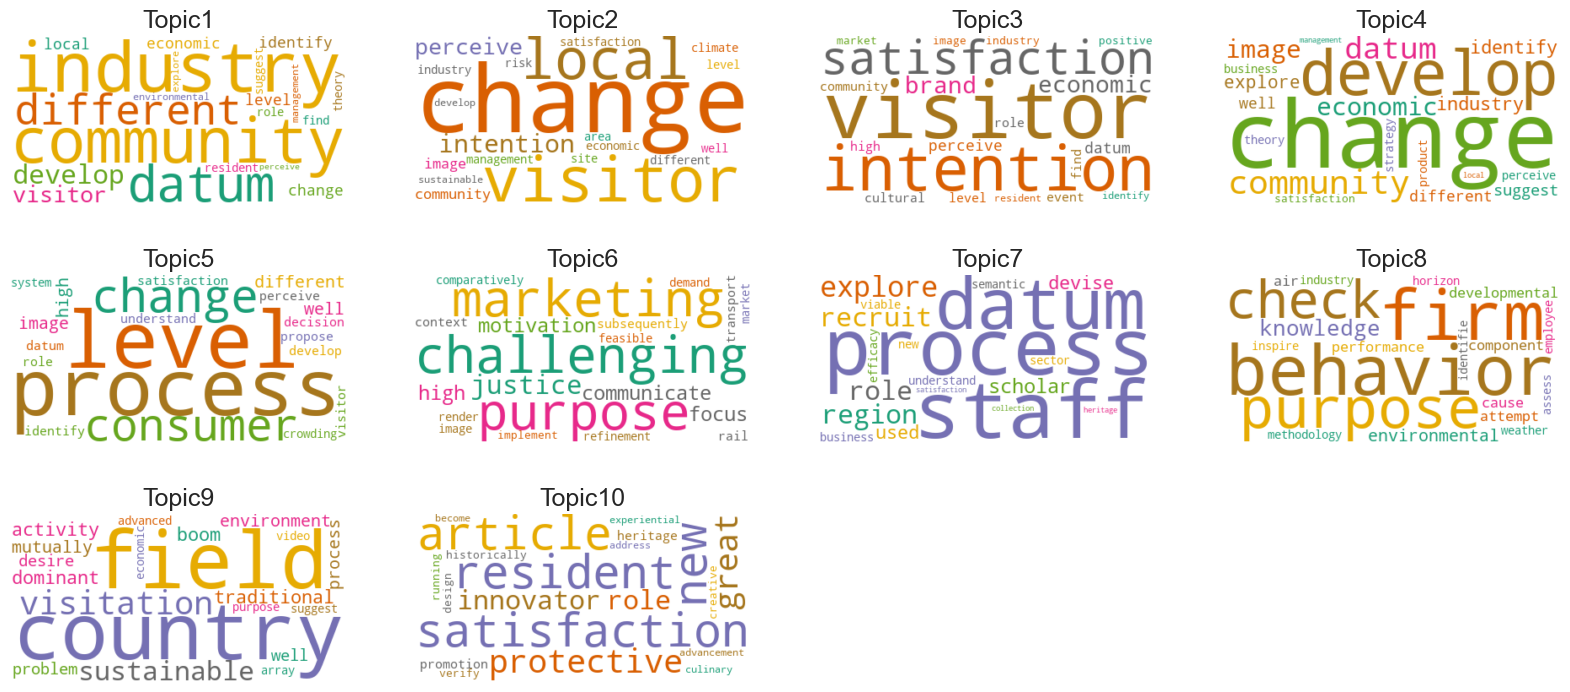

In [63]:

# Create subplots for each topic
for i in range(10):

    wc.generate(text=topics_df["Terms per Topic"][i])
    
    plt.subplot(5, 4, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(topics_df.index[i])

plt.show()

## Dominant Topics for Each Document
We can create a dataframe that shows dominant topic for each document and its percentage in the document.

In [ ]:
#corpus_topic_df['Topic Terms'] = [corpus_topics[t[0]]['Terms per Topic'] for t in corpus_topics]

# https://medium.com/swlh/topic-modeling-lda-mallet-implementation-in-python-part-3-ab03e01b7cd7


In [ ]:
#https://www.youtube.com/watch?v=p1I9Sa1lRvk